# Customer Analysis

## Contents:
#### Assign each order to a region
#### Compare spending by region
#### Create dataset with only active users
#### Create age, income and dependant flags
#### Merge department information
#### Customer profile visualizations
#### Order habits of customer profiles
#### Cross reference of customer profiles

## 1.0 Import Libraries

In [1]:
#Import standard libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Import figure libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2.0 Import data

In [51]:
#Create path for importing data
project_path = r'C:\Users\Owner\Documents\Career Foundry\Instacart Basket Analysis'
#Import customer data
df_cop = pd.read_pickle(os.path.join(project_path, '02 Data', '02 02 Prepared Data', 'orders_products_customers.pkl'))


In [52]:
df_cop.shape

(32404859, 31)

In [53]:
df_cop.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_day', 'grouped_days',
       'busiest_period_of_day', 'max_orders', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days_since', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'num_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

Note: PII was addressed in earlier data cleaning by dropping first and surnames from customer data.

## 3.0 Spending by Region

### 3.1 Assign states to a region

In [54]:
#Assign states to region and put region in empty set
region = []

for value in df_cop['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append('West')
    else:
        region.append('Not identified')

In [55]:
#Add set as 'region' column
df_cop['region'] = region

In [56]:
#Determine number of orders per region
df_cop['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 3.2 Compare average spending by region

In [57]:
#Group orders by region
df_cop.groupby('region')

In [58]:
#Determine mean price by region
df_cop.groupby('region').agg({'prices':['mean','min','max']})

prices           
               mean  min   max
region                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
South      7.794918  1.0  25.0
West       7.790355  1.0  25.0

In [59]:
#Determine number of orders per region by flag
df_cop.value_counts((['spending_flag', 'region']), dropna = False)

spending_flag  region   
Low Spender    South        10582194
               West          8132559
               Midwest       7441350
               Northeast     5614511
High Spender   South          209691
               West           160354
               Midwest        155975
               Northeast      108225
dtype: int64

In [60]:
#Create dataset from results
df_region_spending = df_cop.value_counts((['spending_flag', 'region']), dropna = False)

## 4.0 Disclude infrequent users

### 4.1 Create a flag for inactive users

In [61]:
#Less than five orders are inactive users
df_cop.loc[df_cop['max_orders'] < 5, 'activity_flag'] = 'Low Activity'

In [62]:
#Five orders or more are active users
df_cop.loc[df_cop['max_orders'] >= 5, 'activity_flag'] = 'Regular Activity'

In [65]:
df_cop['activity_flag'].value_counts(dropna = False)

Regular Activity    30964564
Low Activity         1440295
Name: activity_flag, dtype: int64

### 4.2 Create dataframe without low activity users

In [66]:
df_users = df_cop[df_cop['activity_flag']=='Regular Activity']

In [67]:
df_users.shape

(30964564, 33)

## 5.0 Customer Profiling

### 5.1 Create customer flags for reporting

In [68]:
#Review family status category
df_cop['fam_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: fam_status, dtype: int64

In [69]:
#Create flag by age group: senior, adult, young adult
df_cop.loc[df_cop['age'] >= 65, 'age_group'] = 'Senior'
df_cop.loc[(df_cop['age'] < 65) & (df_cop['age'] >= 35), 'age_group'] = 'Adult'
df_cop.loc[df_cop['age'] < 35, 'age_group'] = 'Young Adult'

In [70]:
df_cop['age_group'].value_counts(dropna = False)

Adult          15202120
Young Adult     8627655
Senior          8575084
Name: age_group, dtype: int64

In [71]:
#Create flag by income: upper class, middle class, low income
df_cop.loc[df_cop['income'] <= 50000, 'income_flag'] = 'Low Income'
df_cop.loc[(df_cop['income'] > 50000) & (df_cop['income'] <= 200000), 'income_flag'] = 'Middle Class'
df_cop.loc[df_cop['income'] > 200000, 'income_flag'] = 'Upper Class'

In [72]:
df_cop['income_flag'].value_counts(dropna = False)

Middle Class    28552333
Low Income       3594083
Upper Class       258443
Name: income_flag, dtype: int64

In [73]:
#Create flag by dependants and no dependants
df_cop.loc[df_cop['num_dependants'] <= 0, 'dependants_flag'] = 'No dependants'
df_cop.loc[df_cop['num_dependants'] > 0, 'dependants_flag'] = 'Dependants'

In [74]:
df_cop['dependants_flag'].value_counts(dropna = False)

Dependants       24307356
No dependants     8097503
Name: dependants_flag, dtype: int64

### 5.2 Department information

In [77]:
#Create dataframe from department information
df_dept = pd.read_csv(os.path.join(project_path, '02 Data', '02 02 Prepared Data', 'departments_wrangled.csv'))

In [78]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [79]:
#Rename unnamed column to department_id
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [83]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [85]:
#Merge department information to main dataset
df_cop_merged=df_cop.merge(df_dept,on='department_id')

In [90]:
df_cop_merged.shape

(32404859, 37)

In [91]:
df_cop_merged['department_id'].value_counts(dropna=False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

## 6.0 Visualizations

### 6.1 Customer profile visualizations

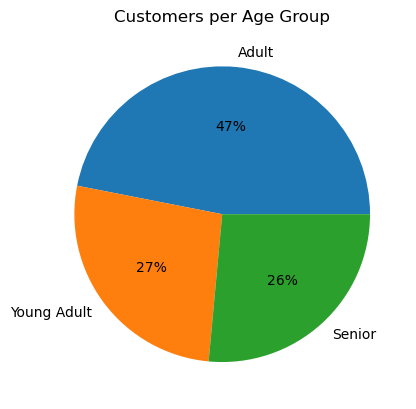

In [96]:
#Percentage of customers per age group
pie_age_group=df_cop_merged['age_group'].value_counts().plot.pie(title='Customers per Age Group',label='',autopct=('%1.f%%'))

In [97]:
#Save visualization
pie_age_group.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'pie_age_group.png'))

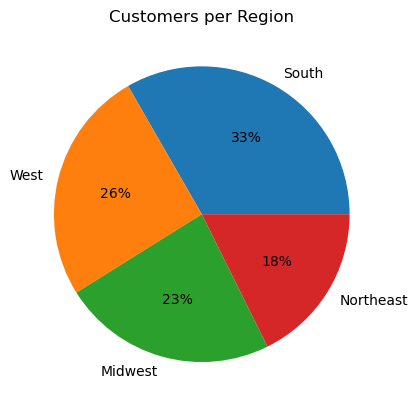

In [98]:
#Percentage of customers per region
pie_region=df_cop_merged['region'].value_counts().plot.pie(title='Customers per Region',label='',autopct=('%1.f%%'))

In [101]:
#Save visualization
pie_region.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'pie_region.png'))

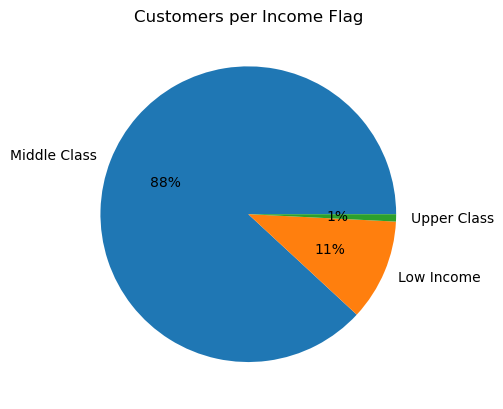

In [99]:
#Percentage of customers per income flag
pie_income_flag=df_cop_merged['income_flag'].value_counts().plot.pie(title='Customers per Income Flag',label='',autopct=('%1.f%%'))

In [100]:
#Save visualization
pie_income_flag.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'pie_income_flag.png'))

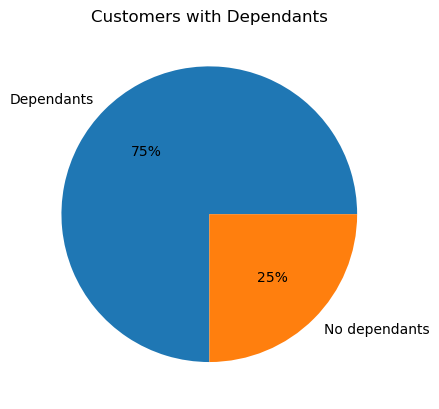

In [102]:
#Percentage of customers with dependants
pie_dependants=df_cop_merged['dependants_flag'].value_counts().plot.pie(title='Customers with Dependants',label='',autopct=('%1.f%%'))

In [104]:
#Save visualization
pie_dependants.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'pie_dependants_flag.png'))

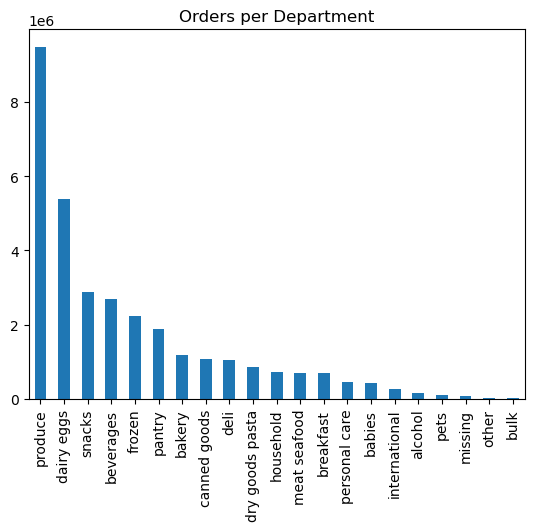

In [106]:
#Create a bar chart for product orders
bar_products = df_cop_merged['department'].value_counts().plot.bar(title='Orders per Department')

In [107]:
#Save visualization
bar_products.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_products.png'))

## 7.0 Aggregrate Functions

In [117]:
#Age Group Aggregrates
df_cop_merged.groupby('age_group').agg({'order_day_of_week':['mean'], 'order_hour_of_day':['mean'], 'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

order_day_of_week order_hour_of_day days_since_prior_order        \
                         mean              mean                    min   max   
age_group                                                                      
Adult                2.739759         13.435711                    0.0  30.0   
Senior               2.745084         13.426524                    0.0  30.0   
Young Adult          2.731117         13.405171                    0.0  30.0   

                       prices                  
                  mean    min   max      mean  
age_group                                      
Adult        11.108966    1.0  25.0  7.790860  
Senior       11.078641    1.0  25.0  7.796546  
Young Adult  11.120753    1.0  25.0  7.785713

In [119]:
#Region
df_cop_merged.groupby('region').agg({'order_day_of_week':['mean'], 'order_hour_of_day':['mean'], 'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

order_day_of_week order_hour_of_day days_since_prior_order        \
                       mean              mean                    min   max   
region                                                                       
Midwest            2.738748         13.444429                    0.0  30.0   
Northeast          2.734961         13.424586                    0.0  30.0   
South              2.740662         13.416887                    0.0  30.0   
West               2.739336         13.418626                    0.0  30.0   

                     prices                  
                mean    min   max      mean  
region                                       
Midwest    11.181836    1.0  25.0  7.792584  
Northeast  11.075769    1.0  25.0  7.782409  
South      11.108108    1.0  25.0  7.794918  
West       11.047196    1.0  25.0  7.790355

In [120]:
#Income group
df_cop_merged.groupby('income_flag').agg({'order_day_of_week':['mean'], 'order_hour_of_day':['mean'], 'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

order_day_of_week order_hour_of_day days_since_prior_order        \
                          mean              mean                    min   max   
income_flag                                                                     
Low Income            2.751707         13.241120                    0.0  30.0   
Middle Class          2.736507         13.450177                    0.0  30.0   
Upper Class           2.821013         13.219321                    0.0  30.0   

                        prices                  
                   mean    min   max      mean  
income_flag                                     
Low Income    11.587220    1.0  25.0  6.696985  
Middle Class  11.052231    1.0  25.0  7.928843  
Upper Class   10.199644    1.0  25.0  7.776825

In [121]:
#Dependants Aggregrates
df_cop_merged.groupby('dependants_flag').agg({'order_day_of_week':['mean'], 'order_hour_of_day':['mean'], 'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

order_day_of_week order_hour_of_day days_since_prior_order  \
                             mean              mean                    min   
dependants_flag                                                              
Dependants               2.740545         13.422517                    0.0   
No dependants            2.733830         13.433048                    0.0   

                                 prices                  
                  max       mean    min   max      mean  
dependants_flag                                          
Dependants       30.0  11.111834    1.0  25.0  7.791334  
No dependants    30.0  11.080805    1.0  25.0  7.789975

In [123]:
#Department Aggregrates
df_cop_merged.groupby('department').agg({'order_day_of_week':['median'], 'order_hour_of_day':['median'], 'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

order_day_of_week order_hour_of_day days_since_prior_order  \
                           median            median                    min   
department                                                                   
alcohol                       3.0              14.0                    0.0   
babies                        3.0              13.0                    0.0   
bakery                        3.0              13.0                    0.0   
beverages                     3.0              13.0                    0.0   
breakfast                     3.0              13.0                    0.0   
bulk                          3.0              13.0                    0.0   
canned goods                  2.0              13.0                    0.0   
dairy eggs                    3.0              13.0                    0.0   
deli                          2.0              13.0                    0.0   
dry goods pasta               2.0              13.0                    0.0   
frozen                        3.0              14.0                    0.0   
household                     3.0              13.0                    0.0   
international                 2.0              13.0                    0.0   
meat seafood                  2.0              13.0                    0.0   
missing                       3.0              13.0                    0.0   
other                         3.0              13.0                    0.0   
pantry                        3.0              13.0                    0.0   
personal care                 3.0              13.0                    0.0   
pets                          3.0              14.0                    0.0   
produce                       2.0              13.0                    0.0   
snacks                        3.0              13.0                    0.0   

                                 prices                   
                  max       mean    min   max       mean  
department                                                
alcohol          30.0  10.340887    1.0  15.0   8.143701  
babies           30.0  10.004465    1.0  15.0   7.638380  
bakery           30.0  11.097613    1.0  15.0   7.853809  
beverages        30.0  11.053389    1.0  15.0   7.680502  
breakfast        30.0  11.296101    1.0  14.9   8.028963  
bulk             30.0  10.104230    1.4  14.1   8.348960  
canned goods     30.0  11.656079    1.0  15.0   7.539976  
dairy eggs       30.0  10.986054    1.0  15.0   8.335056  
deli             30.0  11.345655    1.0  15.0   7.778701  
dry goods pasta  30.0  11.774450    1.0  15.0   7.350283  
frozen           30.0  11.730829    1.0  15.0   7.736553  
household        30.0  11.996490    1.0  15.0   7.384058  
international    30.0  11.291251    1.0  15.0   7.682264  
meat seafood     30.0  11.432021    8.0  25.0  16.294443  
missing          30.0  10.218559    1.0  15.0   8.660716  
other            30.0  10.952867    1.1  15.0   6.990934  
pantry           30.0  11.163256    1.0  20.0   8.009443  
personal care    30.0  11.593145    1.0  15.0   7.996769  
pets             30.0  11.867322    1.0  15.0   7.889070  
produce          30.0  10.856212    1.0  15.0   7.981708  
snacks           30.0  10.947879    1.6   7.0   4.275437

## 8.0 Comparision of Regions with Age and Departments

### 8.1 Age Group

In [124]:
# Creating a crosstab between age and region
age_and_region=pd.crosstab(df_cop_merged['region'],df_cop_merged['age_group'],dropna=False)

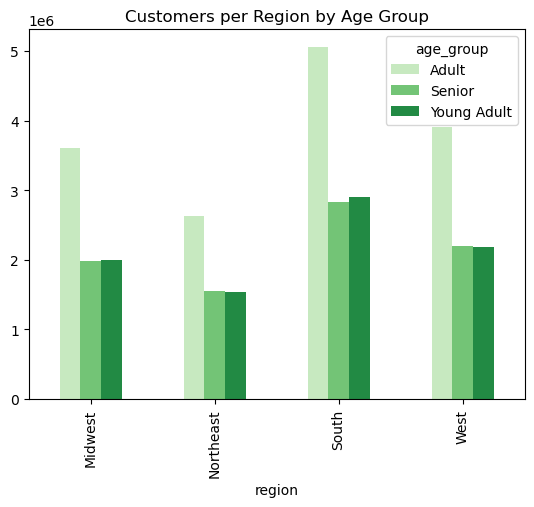

In [125]:
#Create bar chart of cross tab
bar_age_and_region=age_and_region.plot.bar(title='Customers per Region by Age Group', color=sns.color_palette('Greens',3))

In [128]:
#Save visualization
bar_age_and_region.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_age_and_region.png'))

In [126]:
#Creating a crosstab between age and department
age_and_dept=pd.crosstab(df_cop_merged['department'],df_cop_merged['age_group'],dropna=False)

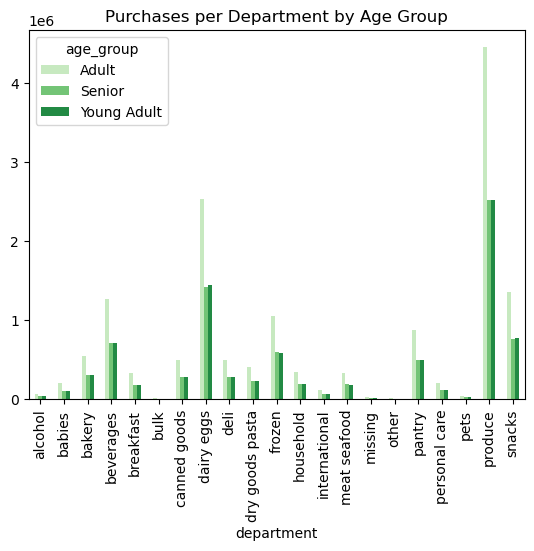

In [127]:
#Create bar chart of cross tab
bar_age_and_dept=age_and_dept.plot.bar(title='Purchases per Department by Age Group', color=sns.color_palette('Greens',3))

In [129]:
#Save visualization
bar_age_and_dept.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_age_dept.png'))

### 8.2 Income Group

In [132]:
#Creating a crosstab between income and region
income_region=pd.crosstab(df_cop_merged['region'],df_cop_merged['income_flag'],dropna=False)

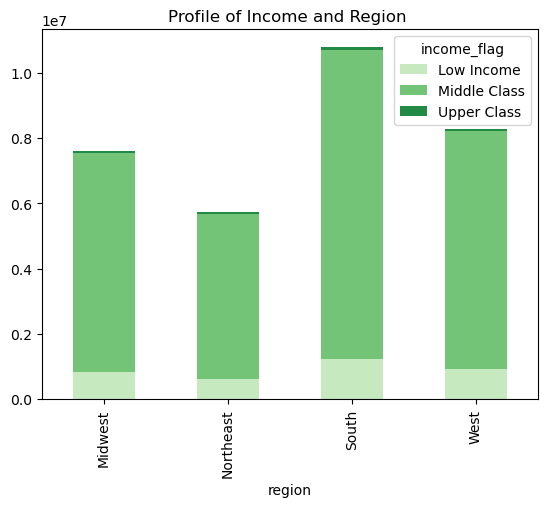

In [136]:
#Create bar chart of cross tab
bar_income_region=income_region.plot.bar(stacked=True, title='Profile of Income and Region ', color=sns.color_palette('Greens',3))

In [138]:
#Save visualization
bar_income_region.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_income_region.png'))

In [139]:
#Creating a crosstab between income and department
income_dept=pd.crosstab(df_cop_merged['department'],df_cop_merged['income_flag'],dropna=False)

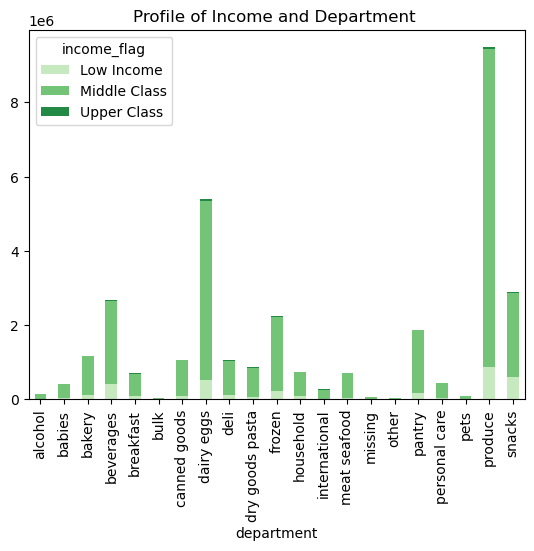

In [141]:
#Create bar chart of cross tab
bar_income_dept=income_dept.plot.bar(stacked=True, title='Profile of Income and Department ', color=sns.color_palette('Greens',3))

In [1]:
#Save visualization
bar_income_dept.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_income_dept.png'))

NameError: name 'bar_income_dept' is not defined

### 8.3 Number of Dependants

In [143]:
#Creating a crosstab
depen_region=pd.crosstab(df_cop_merged['region'],df_cop_merged['dependants_flag'],dropna=False)

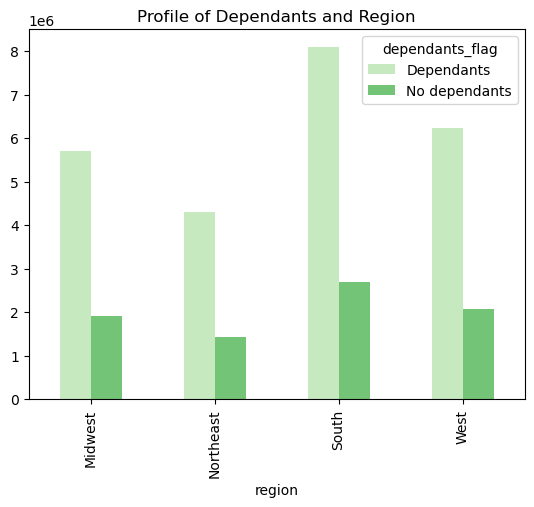

In [145]:
#Create bar chart of cross tab
bar_depen_region=depen_region.plot.bar(title='Profile of Dependants and Region', color=sns.color_palette('Greens',3))

In [146]:
#Save visualization
bar_depen_region.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_depen_region.png'))

In [147]:
#Creating a crosstab
depen_depart=pd.crosstab(df_cop_merged['department'],df_cop_merged['dependants_flag'],dropna=False)

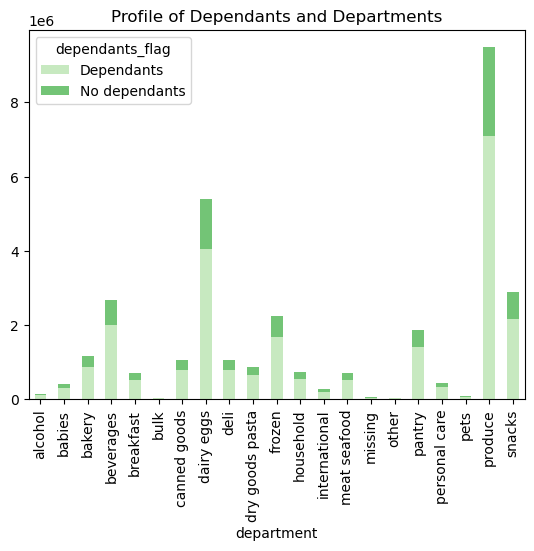

In [149]:
#Create bar chart of cross tab
bar_depen_depart=depen_depart.plot.bar(stacked=True,title='Profile of Dependants and Departments', color=sns.color_palette('Greens',3))

In [150]:
#Save visualization
bar_depen_depart.figure.savefig(os.path.join(project_path, '04 Analysis','04 03 Visualizations', 'bar_depen_depart.png'))

## 5.0 Export Data

In [152]:
#Export active users pkl
df_users.to_pickle(os.path.join(project_path, '02 Data', '02 02 Prepared Data', 'active_users.pkl'))

In [154]:
#Export updated dataframe as a pickle
df_cop_merged.to_pickle(os.path.join(project_path,'02 Data', '02 02 Prepared Data', 'final.pkl'))